# Tutorials summary

The goal of these workshops is to do numerical exercices using MAD-X to visualize transverse dynamics concepts from a different point of view.

**Friday 14th of January**
- Tutorial 1 - Part 1: INTRODUCTION TO THE TOOLS, SMALL NUMERICAL EXERCICES (All together)
- Tutorial 1 - Part 2: FODO + PARAMETRIC PLOTS (groups of 3 students 5min+25min+15min)
- Tutorial 1 - Part 3: FODO + DIPOLES + MATCHING (groups of 3 students 5min+25min+15min)

$\color{red}{\text{WEEKEND: homework exercice (to be delivered on Monday 17th!)}}$

**Monday 17th of January**
- Tutorial 2 - Part 1: CHROMATICITY AND SEXTUPOLES (groups of 3 students 5min+25min+15min)
- Tutorial 2 - Part 2: NON-LINEARITIES AND LARGE AMPLITUDES (groups of 3 students 5min+25min+15min)
- Tutorial 2 - Part 3: TRANFER LINES (groups of 3 students 5min+25min+15min)

$\color{red}{\text{VERY IMPORTANT}}$: Save your jupyter-notebooks and download them to your computer after finishing the tutorials!! Otherwise your work will be lost!

$\color{red}{\text{Tutorial 1 and Tutorial 2 jupyter-notebooks (to be delivered as late on Friday 21st!)}}$ + the homework exercice will count for the final mark on the accelertor design workshop.

$\color{blue}{\text{Notes}}$: 

- For most of the tutorials we will split in groups of 3 students. These groups will be kept also for the accelerator design workshops on the third and fouth weeks of the JUAS course. 


- Tutors (Axel, Guido, Tessa, Davide and Nuria) will go around to help you and answer questions!


- We suggest that you try to solve the exercices by yourself but when you need help please ask your team mates or the tutor and use the screen share option.

<div>
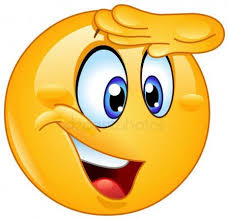
</div>


# Tutorial 1: Part 1

Objectives:

- [Get familiar with the jupyter-notebooks.](#introjupyter)

- [Get familiar with the basic python commands that we will use during the tutorials.](#intropython)

- [Get familiar with python commands to send the information to the MAD-X code and review the main MADX blocks for optics calculations.](#intromadx)

- [How do we compute the optics of a lattice?](#firstexercice)

   

# Jupyter notebook <a id="introjupyter"><a>

- OPEN a jupyter notebook: https://github.com/fusterma/JUAS2022 and click on the binder buttom for the Tutorial1_Part1.


- EDIT/INSERT/DELATE a cell.


- RUN (press bottom on the top command line or press CAPS+ENTER).


- SAVE and DOWNLOAD: after we finish one tutorial you need to SAVE and DOWNLOAD the jupyter-notebook into your PC. Otherwise your progres will be lost! 

     -SAVE BUTTOM on the upper TAB and FILE -> DOWNLOAD. If you want to load the jupyter-notebook in another moment go to FILE -> OPEN.
     
     -SAVE TO BROWSER STORAGE.

# Basic Pyhton commands <a id="intropython"><a>

The python universe has a huge number of libraries that extend the capabilities of python. 
Nearly all of these are open source. For this workshop we will use the following:

In [1]:
############################
# Import special libraries #
############################
#For plotting
from matplotlib import pyplot as plt 
# For numerical calulations (np.max(), np.min(), np.mean()...)
import numpy as np 
# For symbolic computation (solving algebra problems)
import sympy as sp
# For structuring the data, visualization of tables and data manipultion
import pandas as pd 
# Library that allows us to use the MAD-X models 
from cpymad.madx import Madx 
# Plot display
%matplotlib notebook

If you want to learn more about python: https://www.youtube.com/watch?v=kqtD5dpn9C8, https://www.kaggle.com/learn/python

More about the cpymad library: http://hibtc.github.io/cpymad/getting-started

# Scalars, arrays and matrices in Python

In [2]:
# Scalar
a=20
b=30
print(a*b)

600


In [3]:
# Arrays and matrices
sp.Matrix([1,2,3,4]) # 1D array

Matrix([
[1],
[2],
[3],
[4]])

In [4]:
sp.Matrix([[1,2],[3,4]]) # 2x2 matrix

Matrix([
[1, 2],
[3, 4]])

In [5]:
A=sp.Matrix([[1,2],[3,4]])
B=sp.Matrix([[1,2],[3,4]])
A+B

Matrix([
[2, 4],
[6, 8]])

In [6]:
A*B

Matrix([
[ 7, 10],
[15, 22]])

# Plots in Python

<IPython.core.display.Javascript object>


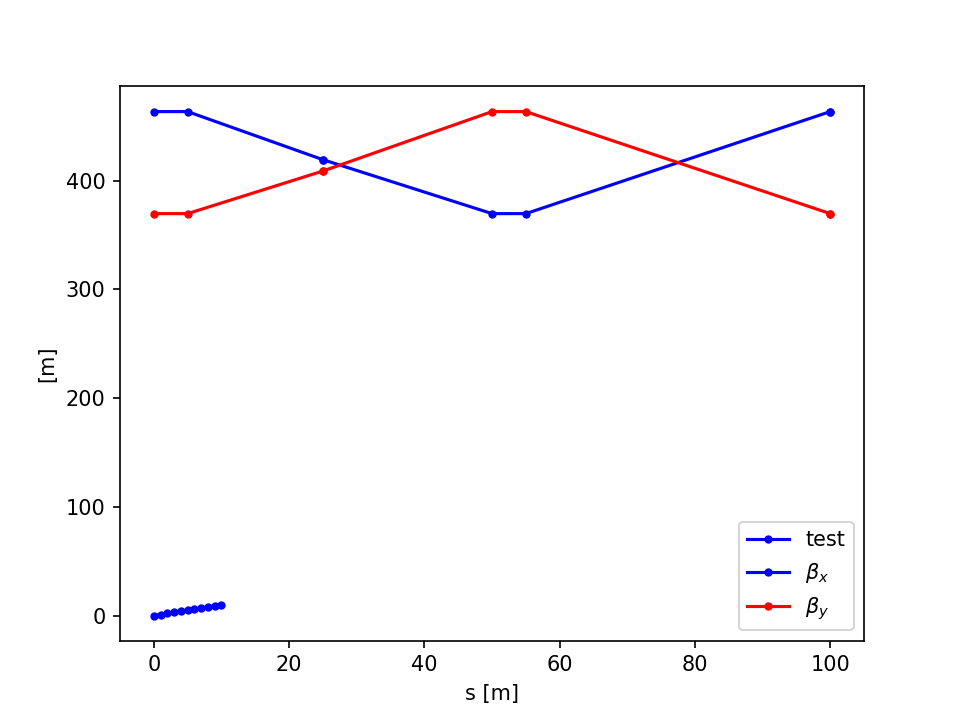

Text(0, 0.5, 'x[m]')

In [7]:
# Plot
%matplotlib notebook
x=[0,1,2,3,4,5,6,7,8,9,10]
y=[0,1,2,3,4,5,6,7,8,9,10]
plt.plot(x,y,'.-b',label='test')
plt.legend()
plt.grid()
plt.xlabel('s [m]')
plt.ylabel('x[m]') 

# An introduction to MAD-X using the python interface <a id="intromadx"><a>

In this first part we are going to get familiar with MAD-X syntax.

For more information please refer to the [MAD-X online manual](http://cern.ch/madx/releases/last-rel/madxuguide.pdf).

**Basic steps:**

   - Load the cpymad library.
   - Instantiate the MADX class (we create an object of the class).
   - Access the methods in the class.
       - From the methods available we will be mainly using the method "input" to send to MADX the commands.

In [8]:
#Load the cpymad library
from cpymad.madx import Madx 

In [9]:
#Launching MAD-X
myMad = Madx(stdout=True)

In [10]:
#String that will be interpreted by MAD-X
myString='''
stop;
'''

In [11]:
#Using the "input" method to send the commandas to the MAD-X class
myMad.input(myString);

With the 'stop;' instruction we exit from MAD-X, so, as done in the following cell we need to re-instantiate our MAD-X object with the 
**myMad = Madx()** instruction.

---
It is a good practice to make header, please use '!' to comment the single line.

In [19]:
# Define and print a value
myMad = Madx(stdout=True)
myString='''

!***************************************
! It is a good practice to make a header
!*************************************** 

a= 20;
value a;

'''
myMad.input(myString);

--- 
Use the **help** keyword (very rudimental help)

In [20]:
# To get information about the MAD-X methods (twiss, beam,match... ) use the commnd "help"
myString='''
help, twiss;
'''
myMad.input(myString);

In [21]:
print(list(myMad.elements))

['drift', 'rbend', 'sbend', 'matrix', 'quadrupole', 'sextupole', 'octupole', 'multipole', 'solenoid', 'rfcavity', 'elseparator', 'srotation', 'yrotation', 'xrotation', 'hkicker', 'kicker', 'vkicker', 'hmonitor', 'monitor', 'vmonitor', 'ecollimator', 'rcollimator', 'beambeam', 'instrument', 'marker', 'twcavity', 'thinwire', 'wire', 'slmonitor', 'blmonitor', 'imonitor', 'dipedge', 'changeref', 'translation', 'crabcavity', 'placeholder', 'tkicker', 'hacdipole', 'vacdipole', 'nllens', 'rfmultipole', 'collimator', 'changerefp0', 'sixmarker']


In [22]:
myString='''
help, drift;
'''
myMad.input(myString);

# Let's define the main ingredients to design a simple lattice and compute the optics in MAD-X!

# Definition of main parameters

In [23]:
myString='''
! *********************************************************************
! Definition of parameters
! *********************************************************************

l_cell=100;
quadrupoleLenght=5;
f=200;
myK:=1/f/quadrupoleLenght;// m^-2

'''
myMad.input(myString);

# Definition of magets

In [24]:
myString='''

! *********************************************************************
! Definition of magnets
! ********************************************************************* 
QF: quadrupole, L=quadrupoleLenght, K1:=myK;
QD: quadrupole, L=quadrupoleLenght, K1:=-myK;
'''
myMad.input(myString);

# Definition of sequence

In [25]:
myString='''

! *********************************************************************
! Definition of sequence
! *********************************************************************
myCell:sequence, refer=entry, L=L_CELL;
quadrupole1: QF, at=0;
marker1: marker, at=25;
quadrupole2: QD, at=50;
endsequence;

'''
myMad.input(myString);

# Definition of the beam

In [26]:
myString='''

! *********************************************************************
! Definition of beam
! *********************************************************************
beam, particle=proton, energy=2;

'''
myMad.input(myString);

# Activate sequence

In [27]:
myString='''

! *********************************************************************
! Use of the sequence
! *********************************************************************
use, sequence=myCell;

'''
myMad.input(myString);

# Execute action

In [28]:
myString='''

! *********************************************************************
! TWISS
! *********************************************************************
title, 'My first twiss';
select, flag=TWISS, column=keyword, name, s, betx, bety,alfx, alfy, x, y, dx, dy;

twiss, file=Test_Nuria.madx;
plot, haxis=s, vaxis=betx,bety,dx,colour=100,file=Test_Nuria;

'''

The OUTPUT generated by MADX can be found by accessing the jupyter-notebook files-view.
- For accessing: CLIC on the jupyter-logo on the top of the page using the right buttom of your mouse and use the option "Open Link in a New Tab".

**Output:**

- SUMM table

- TWISS table

- TWISS .txt file

- TWISS .ps plot

# All together

In [29]:
myMad = Madx(stdout=True)
myString='''
! *********************************************************************
! Definition of parameters
! *********************************************************************

l_cell=100;
quadrupoleLenght=5;
f=200;
myK:=1/f/quadrupoleLenght;// m^-2

! *********************************************************************
! Definition of magnets
! ********************************************************************* 
QF: quadrupole, L=quadrupoleLenght, K1:=myK;
QD: quadrupole, L=quadrupoleLenght, K1:=-myK;

! *********************************************************************
! Definition of sequence
! *********************************************************************
myCell:sequence, refer=entry, L=L_CELL;
quadrupole1: QF, at=0;
marker1: marker, at=25;
quadrupole2: QD, at=50;
endsequence;

! *********************************************************************
! Definition of beam
! *********************************************************************
beam, particle=proton, energy=2;

! *********************************************************************
! Use of the sequence
! *********************************************************************
use, sequence=myCell;

! *********************************************************************
! TWISS
! *********************************************************************
title, 'My first twiss';
select, flag=TWISS, column=keyword, name, s, betx, bety,alfx, alfy, x, y, dx, dy;

twiss, file=Test_Nuria.madx;
plot, haxis=s, vaxis=betx,bety,dx,colour=100,file=Test_Nuria;
'''
myMad.input(myString);

# Accessing the data

- Open the files generated by MADX.
- Use python and output the required data on the jupyter-notebook.
    - Using MADX commands and the **input()** method.
    - Using cpymad methods:
        - **myMad.table.twiss.dframe()**
        - **myMad.table.summ.dframe()**

In [33]:
#######################
#Using MAD-X commands #
#######################

myString='''
value, table(SUMM,Q1);
value, table(SUMM,betxmax);
'''
myMad.input(myString);

And for the vertical plane?

In [34]:
#######################
#Using MAD-X commands #
#######################

myString='''
value, table(SUMM,Q2);
value, table(SUMM,betymax);
'''
myMad.input(myString);

In [35]:
myString='''
value, table(TWISS,MYCELL$END,betx);
value, table(TWISS,MYCELL$END,bety);
'''
myMad.input(myString);

# Using python pandas library

Pandas dataframe are very convenient, have a look in https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf.

In [37]:
# Using another method from cpymad "table.twiss.dframe()"
myDF=myMad.table.twiss.dframe()

In [38]:
myDF

,name,keyword,s,betx,alfx,mux,bety,alfy,muy,x,...,sig54,sig55,sig56,sig61,sig62,sig63,sig64,sig65,sig66,n1
#s,mycell$start:1,marker,0.0,463.623288,-1.156109,0.000000,369.779162,0.929316,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
quadrupole1,quadrupole1:1,quadrupole,5.0,463.623288,1.156109,0.001709,369.779162,-0.929316,0.002161,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_0[0],drift_0:0,drift,25.0,419.394867,1.055312,0.008930,408.967742,-1.030113,0.010350,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
marker1,marker1:1,marker,25.0,419.394867,1.055312,0.008930,408.967742,-1.030113,0.010350,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_1[0],drift_1:0,drift,50.0,369.779162,0.929316,0.019041,463.623288,-1.156109,0.019493,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
quadrupole2,quadrupole2:1,quadrupole,55.0,369.779162,-0.929316,0.021202,463.623288,1.156109,0.021202,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_2[0],drift_2:0,drift,100.0,463.623288,-1.156109,0.038533,369.779162,0.929316,0.038533,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#e,mycell$end:1,marker,100.0,463.623288,-1.156109,0.038533,369.779162,0.929316,0.038533,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
myDF[['name','s','betx','bety','alfx','alfy']]

,name,s,betx,bety,alfx,alfy
#s,mycell$start:1,0.0,463.623288,369.779162,-1.156109,0.929316
quadrupole1,quadrupole1:1,5.0,463.623288,369.779162,1.156109,-0.929316
drift_0[0],drift_0:0,25.0,419.394867,408.967742,1.055312,-1.030113
marker1,marker1:1,25.0,419.394867,408.967742,1.055312,-1.030113
drift_1[0],drift_1:0,50.0,369.779162,463.623288,0.929316,-1.156109
quadrupole2,quadrupole2:1,55.0,369.779162,463.623288,-0.929316,1.156109
drift_2[0],drift_2:0,100.0,463.623288,369.779162,-1.156109,0.929316
#e,mycell$end:1,100.0,463.623288,369.779162,-1.156109,0.929316


In [40]:
myDF["s"]

#s               0.0
quadrupole1      5.0
drift_0[0]      25.0
marker1         25.0
drift_1[0]      50.0
quadrupole2     55.0
drift_2[0]     100.0
#e             100.0
Name: s, dtype: float64

In [41]:
myDF["betx"]

#s             463.623288
quadrupole1    463.623288
drift_0[0]     419.394867
marker1        419.394867
drift_1[0]     369.779162
quadrupole2    369.779162
drift_2[0]     463.623288
#e             463.623288
Name: betx, dtype: float64

In [42]:
myDF2=myMad.table.summ.dframe()

In [43]:
myDF2

,length,orbit5,alfa,gammatr,q1,dq1,betxmax,dxmax,dxrms,xcomax,...,ycorms,deltap,synch_1,synch_2,synch_3,synch_4,synch_5,synch_6,synch_8,nflips
#e,100.0,-0.0,0.0,0.0,0.038533,-0.043847,463.623288,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
myDF2["q1"]

#e    0.038533
Name: q1, dtype: float64

# Basic plot

In [45]:
#Plot
plt.plot(myDF['s'],myDF['betx'],'.-b',label='$\\beta_x$')
plt.plot(myDF['s'],myDF['bety'],'.-r',label='$\\beta_y$')
#Labels of the plot
plt.xlabel('s [m]')
plt.ylabel('[m]')
#Legend and grid
plt.legend(loc='best')
plt.grid()

# How do we compute the optics of a lattice? <a id="firstexercice"><a>

    
- I want to motivate the use of optics codes such as MAD-X and at the same time illustrate the logic behind some of the methods.
    

- The TWISS method is based on matrix multiplications where first and second order transport matrices are used to get the TWISS functions and the closed orbit of your machine.


# FODO cell
- Compute the linear optics functions of a FODO cell, which is the simplier combination of quadrupoles required to focuse the beam in both, vertical and horizontal planes (no dispersion, no coupling, no chromticity...).

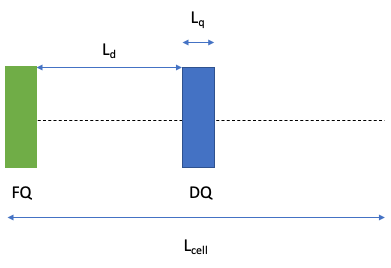

# Thin lens approximation (f>>lq)

- To do some first estimations analytically one uses the thin lense approximation.

In [46]:
# How do we compute the one-turn transfer matrix of the FODO?
K = sp.Symbol("K", positive = True)
Lq = sp.Symbol("Lq", positive = True)
Ld = sp.Symbol("Ld", positive = True)

Mfoc=sp.Matrix([[1,0],[-K*Lq,1]])

Mdefoc=sp.Matrix([[1,0],[K*Lq,1]])

Mdrift=sp.Matrix([[1,Ld],[0,1]])

In [47]:
#################################################
# Transport matrix of half focusing quadrupople #
#################################################
Mfoc

Matrix([
[    1, 0],
[-K*Lq, 1]])

In [48]:
##############################################
# Transport matrix of defocusing quadrupople #
##############################################
Mdefoc

Matrix([
[   1, 0],
[K*Lq, 1]])

In [49]:
##############################################
# Transport matrix of defocusing quadrupople #
##############################################
Mdrift

Matrix([
[1, Ld],
[0,  1]])

In [50]:
M=Mdrift*Mdefoc*Mdrift*Mfoc
M=sp.simplify(M)
M

Matrix([
[-K**2*Ld**2*Lq**2 - K*Ld*Lq + 1, Ld*(K*Ld*Lq + 2)],
[                 -K**2*Ld*Lq**2,      K*Ld*Lq + 1]])

In [51]:
M_thin = M.subs(K, 1/(200*5)).subs(Lq, 5).subs(Ld, 45) # units K in m-2, Lq and Ld in m
M_thin

Matrix([
[ 0.724375, 100.125],
[-0.001125,   1.225]])

It is clear that the exact solution of the prticle motion has to be calculted in full detail but using some approximations we can make the first steps easier and estimate the order of magnitud of some magnetic properties of our lattice.

# What can we do with the  transfer matrix?
   - This matrix describes the optical properties of the lattice and defines the beam parameters.
   - We can propagate the phase space coordinates of a particle with a given set of initial coordinates.
   - We can compute the periodic solution TWISS functions.
   - We can make parametric plots.

In [52]:
# Transfer matrix
R11, R12, R21, R22 = sp.symbols('R11,R12,R21,R22')

Mt=sp.Matrix([[R11,R12],[R21,R22]])
Mt

Matrix([
[R11, R12],
[R21, R22]])

In [53]:
# In case of periodic conditions in the accelerator there is another way to describe the particles trjectories.
# Periodic solution oner-turn-transfer matrix in terms of twiss functions:
a, b, g, m = sp.symbols(r'\alpha,\beta, \gamma,\mu')
M=sp.Matrix([[sp.cos(m)+a*sp.sin(m),b*sp.sin(m)],[-g*sp.sin(m),sp.cos(m)-a*sp.sin(m)]])
M

Matrix([
[\alpha*sin(\mu) + cos(\mu),              \beta*sin(\mu)],
[          -\gamma*sin(\mu), -\alpha*sin(\mu) + cos(\mu)]])

In [54]:
#For the phase advance we use the trace of the matrix
sp.Eq(sp.cos(m),(R11+R22)/2)

Eq(cos(\mu), R11/2 + R22/2)

In [55]:
#For the beta function we use the R12 matrix element
sp.Eq(b,R12/sp.sin(m))

Eq(\beta, R12/sin(\mu))

In [56]:
#For the alfa function we use the trace of the matrix also
sp.Eq(a,(R11-R22)/(2*sp.sin(m)))

Eq(\alpha, (R11 - R22)/(2*sin(\mu)))

In [57]:
#For the gamma we use the R21 element
sp.Eq(g,-(R21/sp.sin(m)))

Eq(\gamma, -R21/sin(\mu))

Once you have computed the periodic TWISS functions you can propagate them to any point in the machine using the transfer matrix of the TWISS functions from Transverse dynamics course.

In [58]:
sp.Matrix([[R11**2, -2*R12*R11, R12**2],[-R11*R21,R12*R21+R22*R11, -R12*R22],[R21**2,-2*R22*R21, R22**2]])

Matrix([
[  R11**2,        -2*R11*R12,   R12**2],
[-R11*R21, R11*R22 + R12*R21, -R12*R22],
[  R21**2,        -2*R21*R22,   R22**2]])

Using the periodic one-turn-matrix one can define some interesting relations between the TWISS parameters and the magnetic properties of the lattice.

# Figure 1: Relation between $\Delta \mu$, K, $L_{cell}$, $L_q$

In [59]:
# Relation between the phase advance of the cell and K, Lcell, Lq
a, b, g, m, d, Lq, Lc, K, pi = sp.symbols(r'\alpha,\beta, \gamma,\mu, \Delta, L_{q}, L_{cell} K \pi')
sp.Eq(d*m/pi,2*sp.asin(K*Lq*Lc/4))

Eq(\Delta*\mu/\pi, 2*asin(K*L_{cell}*L_{q}/4))

<ipython-input-60-85ac7794e4a0>:3: RuntimeWarning: invalid value encountered in arcsin
  y=2*np.arcsin(x/4)/np.pi


<IPython.core.display.Javascript object>


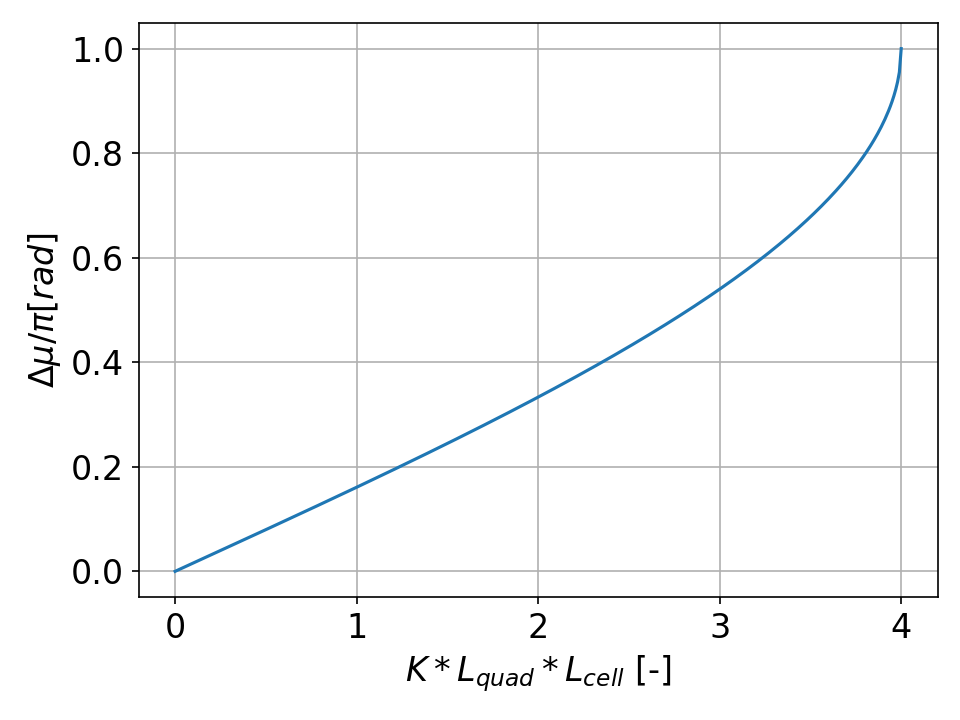

In [60]:
#Add the interesting formula for the FODO cell of mu and bmax and bmin and make the parametric plots
x=np.arange(0,6,0.01)
y=2*np.arcsin(x/4)/np.pi
fig, ax1 = plt.subplots()
ax1.plot(x,y,'-')
ax1.set_ylabel("$\Delta \mu / \pi [rad]$", fontsize=16)
ax1.set_xlabel("$K*L_{quad}*L_{cell}$ [-]", fontsize=16)
ax1.grid()
ax1.tick_params(axis='both', labelsize=16)
plt.tight_layout()  

# Exercice:
- What is the quadrupole strenght to match a FODO cell phase advance of 45$^\circ$ if the $L_{quad}$=5 m and $L_{cell}$=100 m?

- And for a FODO cell phase advance of 90$^\circ$?

- What is the maximum phase advance in a FODO cell?

In [61]:
#for 45 degrees K*Lcell*lq=1.528
#K[m^(-2)]=
1.528/100/5

0.003056

In [62]:
#for 90 degrees K*Lcell*lq=2.842
#K[m^(-2)]=
2.842/100/5

0.005684

In [ ]:
#The functions goes assimptotically to 1 corresponding to a phase advance of 180 degrees.

# Figure 2: Relation between $\beta_{max}$ and $\beta_{min}$ with K, $L_{cell}$, $L_q$

In [63]:
# Relation between the beta of the cell and K, Lcell, Lq
a, bmin, bmax, g, m, d, Lq, Lc, K, pi = sp.symbols(r'\alpha,\beta_{min}, \beta_{max}, \gamma,\mu, \Delta, L_{q}, L_{cell} K \pi')
sp.Eq(bmin/Lc,(1-(K*Lq*Lc/4))/(sp.sin(2*sp.asin(K*Lq*Lc/4))))

Eq(\beta_{min}/L_{cell}, (-K*L_{cell}*L_{q}/4 + 1)/sin(2*asin(K*L_{cell}*L_{q}/4)))

In [64]:
sp.Eq(bmax/Lc,(1+(K*Lq*Lc/4))/(sp.sin(2*sp.asin(K*Lq*Lc/4))))

Eq(\beta_{max}/L_{cell}, (K*L_{cell}*L_{q}/4 + 1)/sin(2*asin(K*L_{cell}*L_{q}/4)))

<IPython.core.display.Javascript object>


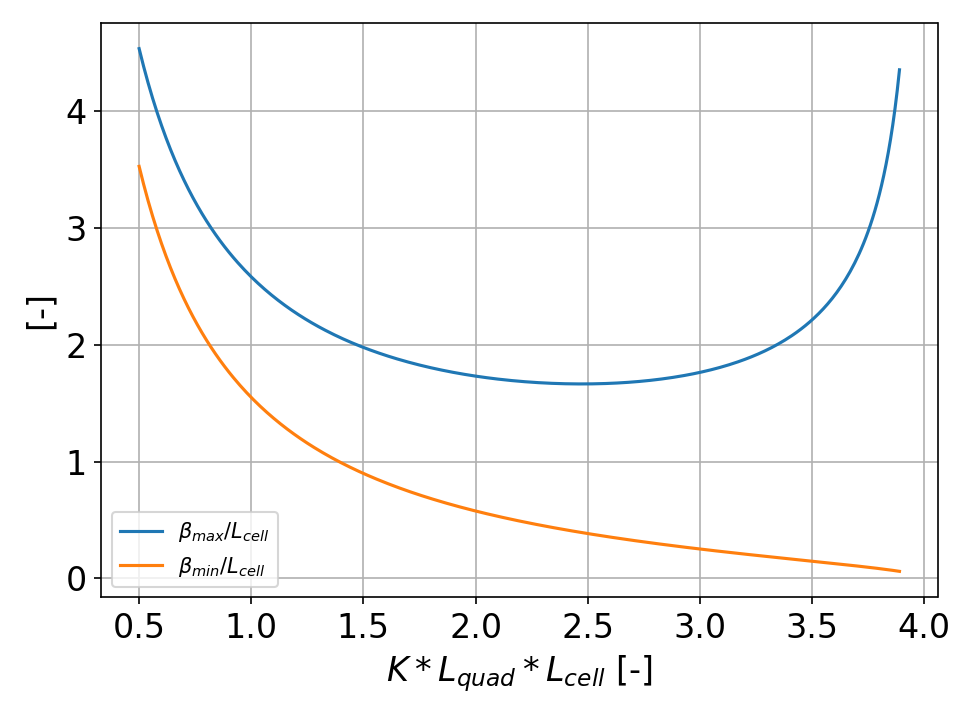

In [65]:
x=np.arange(0.5,3.90,0.01)
betamax=(1+(x/4))/(np.sin(2*np.arcsin(x/4)))
betamin=(1-(x/4))/(np.sin(2*np.arcsin(x/4)))
fig, ax1 = plt.subplots()
ax1.plot(x,betamax,'-',label=r"$\beta_{max}/L_{cell}$")
ax1.plot(x,betamin,'-',label=r"$\beta_{min}/L_{cell}$")
ax1.set_ylabel("[-]", fontsize=16)
ax1.set_xlabel("$K*L_{quad}*L_{cell}$ [-]", fontsize=16)
plt.grid()
plt.legend()
plt.tick_params(axis='both', labelsize=16)
plt.tight_layout()  

# Exercice:
- What is K and $L_{cell}$ to match a FODO cell with a phase advance of 45$^\circ$ and a $\beta_{max}$ of 200 m? The  $L_{quad}$=2 m.

- What is K and $L_{cell}$ to match a FODO cell with a phase advance of 45$^\circ$ and a $\beta_{max}$ of 100 m? The  $L_{quad}$=2 m.

In [69]:
# From Figure 1 we get that for 45 degrees K*Lcell*Lq=1.528, for this value in Figure 2 we get that bmax/Lcell=1.960
# Lcell=
200/1.960

102.04081632653062

In [68]:
#And replacing in K*Lcell*Lq=1.528 from Figure 1.
# K=
1.528/102/2

0.007490196078431373

In [70]:
# From Figure 1 we get that for 45 degrees K*Lcell*Lq=1.528, for this value in Figure 2 we get that bmax/Lcell=1.960
# Lcell=
100/1.960

51.02040816326531

In [72]:
#And replacing in K*Lcell*Lq=1.528 from Figure 1.
# K=
1.528/51/2

0.014980392156862745

# Thick lense computation

In [75]:
K = sp.Symbol("K")
Lq = sp.Symbol("Lq")
Ld= sp.Symbol("Ld")

Mfoc=sp.Matrix([[sp.cos(sp.sqrt(K)*Lq),1/(sp.sqrt(K))*sp.sin(sp.sqrt(K)*Lq)],[-(sp.sqrt(K))*sp.sin(sp.sqrt(K)*Lq),sp.cos(sp.sqrt(K)*Lq)]])

Mdefoc=sp.Matrix([[sp.cosh(sp.sqrt(K)*Lq),1/(sp.sqrt(K))*sp.sinh(sp.sqrt(K)*Lq)],[(sp.sqrt(K))*sp.sinh(sp.sqrt(K)*Lq),sp.cosh(sp.sqrt(K)*Lq)]])

Mdrift=sp.Matrix([[1,Ld],[0,1]])

In [76]:
#################################################
# Transport matrix of half focusing quadrupople #
#################################################
Mfoc

Matrix([
[         cos(sqrt(K)*Lq), sin(sqrt(K)*Lq)/sqrt(K)],
[-sqrt(K)*sin(sqrt(K)*Lq),         cos(sqrt(K)*Lq)]])

In [77]:
##############################################
# Transport matrix of defocusing quadrupople #
##############################################
Mdefoc

Matrix([
[        cosh(sqrt(K)*Lq), sinh(sqrt(K)*Lq)/sqrt(K)],
[sqrt(K)*sinh(sqrt(K)*Lq),         cosh(sqrt(K)*Lq)]])

In [78]:
##############################################
# Transport matrix of defocusing quadrupople #
##############################################
Mdrift

Matrix([
[1, Ld],
[0,  1]])

In [83]:
M=Mdrift*Mdefoc*Mdrift*Mfoc
M=sp.simplify(M)
M

Matrix([
[(sqrt(K)*Ld*sinh(sqrt(K)*Lq) + cosh(sqrt(K)*Lq))*cos(sqrt(K)*Lq) - (2*sqrt(K)*Ld*cosh(sqrt(K)*Lq) + K*Ld**2*sinh(sqrt(K)*Lq) + sinh(sqrt(K)*Lq))*sin(sqrt(K)*Lq), ((sqrt(K)*Ld*sinh(sqrt(K)*Lq) + cosh(sqrt(K)*Lq))*sin(sqrt(K)*Lq) + (2*sqrt(K)*Ld*cosh(sqrt(K)*Lq) + K*Ld**2*sinh(sqrt(K)*Lq) + sinh(sqrt(K)*Lq))*cos(sqrt(K)*Lq))/sqrt(K)],
[                                                  -sqrt(K)*((sqrt(K)*Ld*sinh(sqrt(K)*Lq) + cosh(sqrt(K)*Lq))*sin(sqrt(K)*Lq) - cos(sqrt(K)*Lq)*sinh(sqrt(K)*Lq)),                                                                        (sqrt(K)*Ld*sinh(sqrt(K)*Lq) + cosh(sqrt(K)*Lq))*cos(sqrt(K)*Lq) + sin(sqrt(K)*Lq)*sinh(sqrt(K)*Lq)]])

In [84]:
M_thick = M.subs(K, 1/(200*5)).subs(Lq, 5).subs(Ld,45) # units K in m-2, Lq and Ld in m
M_thick

Matrix([
[   0.693651062898885, 111.155823182084],
[-0.00120832527282141, 1.24801597796155]])

In [85]:
M_thin

Matrix([
[ 0.724375, 100.125],
[-0.001125,   1.225]])

In real world applications, lattices (including FODO) are not designed by hand but
dedicated software is used to do the design and simulation as for example MAD-X.

The TWISS in MADX it is based in matrix multiplications similar to what has been shown here however if you want something more complicated it isn't anymore that easy. 

# Wha is next?

- Now we are going to do optics calculations using MAD-X TWISS command (handle thousands of elements, thin or thick lense options, and higher order contributions...).


- We will use the MATCHING MAD-X tool to compute the required magnetic properties for a desired TWISS functions.


- We will use MAD-X to visulize the impact of some propertie of the lattice on the TWISS and single prticle DYNAMICS.

# For reference...

---
This is an example to get familiar with the use of the physical constants and the formatting of the output. Have a look on the difference.

In [86]:
myString='''
a=pi;
value a; 
set, format="22.20e";
value a; 
'''
myMad.input(myString);

# 
This is an example to get familiar with if and deferred expression. Please note the after the block delimited with {...} the ; can be omitted. Pay attention to circular call!


In [87]:
myString='''
if (1==1){
option, echo=false, info=true;
a=pi;
b:=a;
c=a;
value a; 
value b;
value c;
a=CLIGHT*cos(a);
value a;
value b;
value c;}
! BEWARE of circular call!
!a:=a+1;
! When evaluating you will get a fatal error
! value a; 
option, echo=true, info=true;
'''
myMad.input(myString);

# ---
This is an example to get familiar with **while** and **macros** loops.

In [88]:
myString='''
a(myvariable1,myvariable2): macro = {
value, myvariable1;
value, myvariable1*myvariable2;
}

N=1;
while (N<10){
exec, a(N,N);
N=N+1;
}
'''
myMad.input(myString);

---
### List of functions
In MAD-X the following functions are available

- SQRT(x) square root,
- LOG(x) natural logarithm,
- LOG10(x) logarithm base 10,
- EXP(x) exponential,
- SIN(x) trigonometric sine,
- COS(x) trigonometric cosine,
- TAN(x) trigonometric tangent,
- ASIN(x) arc sine,
- ACOS(x) arc cosine,
- ATAN(x) arc tangent,
- SINH(x) hyperbolic sine,
- COSH(x) hyperbolic cosine,
- TANH(x) hyperbolic tangent,
- SINC(x) cardinal sine function,
- ABS(x) absolute value,
- ERF(x) Gauss error,
- ERFC(x) complementary error,
- FLOOR(x) floor, largest previous integer,
- CEIL(x) ceiling, smallest next integer,
- ROUND(x) round, closest integer,
- FRAC(x) fractional part of number,
- RANF() random number, uniformly distributed in [0,1],
- GAUSS() random number, gaussian distribution with unit standard deviation,
- TGAUSS(x) random number, gaussian distribution with unit standard deviation, truncated at x standard deviations;

---
### List of physical constant

| MAD-X name  | symbol  |  value |unit|
|:-:|:-:|:-:|:-:|
|PI| π |4 * atan(1)| 1|
|TWOPI|2π| 2 * PI| 1|
|DEGRAD| 180/π |180 / PI| deg/rad|
|RADDEG| π/180 |PI / 180 |rad/deg|
|E| e |exp(1) |1|
|EMASS| me |0.510998928e−3| GeV|
|PMASS| mp |0.938272046| GeV|
|NMASS| u |0.931494061| GeV|
|MUMASS| mµ| 0.1056583715 |GeV|
|CLIGHT| c| 299792458| m/s|
|QELECT| e| 1.602176565e−19| A.s|
|HBAR| ¯h| 6.58211928e−25| MeV.s|
|ERAD| re| 2.8179403267e−15| m|
|PRAD| re(me/mp)| ERAD*EMASS/PMASS| m|

# Inheritance and -> operator